
# PROJECT ON PREDICTING THE RETURN ON MARKETING INVESTMENTS OF A DIGITAL MARKETING CAMPAIGN

## OBJECTIVE
*  Analyse and build a predictive model to determine if marketing investments are delivering positive Return on Investments


## OUTCOME
* For the campaign, the revenue is higher that the marketing spend
* Promotion Blue has more Costs per Clicks than Promotion Red for all time variables
* No Promotion had more Costs per clicks at the earlier stages and then started declining
* When it comes to ROMI, Promotion Red seems to be more effective

 First of all I import all the necessary modules necessary for analysing this data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


C:\Users\hp\AppData\Local\Temp\ipykernel_14328\1723181584.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Then I import my files using the pandas module

In [2]:
df1 = pd.read_csv("Revenue Data 1.csv")
df2 = pd.read_csv("Revenue Data 2.csv")
df3 = pd.read_csv("Marketing Data.csv")
df4 = pd.read_excel("Clicks Data.xlsx")


In [3]:
print(df1.dtypes)
print(df2.dtypes)
print(df3.dtypes)
print(df4.dtypes)

Date             object
Week_ID         float64
Month Number    float64
Month_ID        float64
Year              int64
Day_Name         object
Revenue         float64
dtype: object
Date             object
Week_ID         float64
Month Number    float64
Month_ID        float64
Year            float64
Day_Name         object
Revenue         float64
dtype: object
Date                object
Marketing Spend    float64
Promo               object
dtype: object
Date      datetime64[ns]
Clicks           float64
dtype: object


I checked the data types and I realised that the date columns for 3 data set are set to object instead of datetime 

hence i will change it using the below function

In [4]:
df1["Date"]= pd.to_datetime(df1["Date"], dayfirst=True)
df2["Date"]= pd.to_datetime(df2["Date"], dayfirst=True)
df3["Date"]= pd.to_datetime(df3["Date"], dayfirst=True)


I will then merge the first two data sets as one is a continuation of the other and i will do that using the concat function

In [5]:
df5 = pd.concat([df1,df2], ignore_index=True, axis=0)
df5 

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.0
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.0
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.0
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.0
...,...,...,...,...,...,...,...
184,2021-05-08,60.0,5.0,17.0,2021.0,Saturday,5927.0
185,2021-05-09,61.0,5.0,17.0,2021.0,Sunday,3861.0
186,2021-05-10,NaN,NaN,NaN,NaN,NaN,NaN
187,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN


I'll create another variable and merge the third variable but since this data set doesn't have the same exact column as the other two I'll merge it using a 

common column they all have which is the "Date" column and merge function will be more appropriate for that

In [6]:
df6 = pd.merge(df5,df3, on="Date")


In [7]:
df6

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375,No Promo
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250,Promotion Red
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375,Promotion Blue
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750,No Promo
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500,No Promo
...,...,...,...,...,...,...,...,...,...
184,2021-05-08,60.0,5.0,17.0,2021.0,Saturday,5927.0,1121.875,No Promo
185,2021-05-09,61.0,5.0,17.0,2021.0,Sunday,3861.0,871.000,No Promo
186,2021-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using the same reason, as earlier written I'll merge the fourth data set

In [8]:
df7 = pd.merge(df6,df4, on="Date")

In [9]:
df7.head()


,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375,No Promo,707.0
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250,Promotion Red,1455.0
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375,Promotion Blue,1520.0
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750,No Promo,1726.0
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500,No Promo,2134.0


In [10]:
DF = df7


In [11]:
DF.shape

(189, 10)

In [12]:
DF.isnull().sum()

Date                0
Week_ID             7
Month Number        7
Month_ID            7
Year                3
Day_Name            7
Revenue            11
Marketing Spend     7
Promo               3
Clicks              8
dtype: int64

Looking at my data set, I noticed we have a 4 duplicated dates but one is empty while the other has actual values. There are two ways I'm going to handle my missing values
* First by using mean imputation 
* Second by dropping the null values most especially for the null dplicated dates

In [13]:
# Finding the mean for Click column
c_mean=DF["Clicks"].mean()

In [14]:
#Inputing the mean of the click column to replace null values
DF["Clicks"].fillna(c_mean, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14328\2504921296.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF["Clicks"].fillna(c_mean, inplace=True)


In [15]:
#Finding the mean for the revenue column
r_mean = DF["Revenue"].mean()

In [16]:
# Replacing the null values of the Revenue column with the mean
DF["Revenue"].fillna(r_mean,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14328\3707386790.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF["Revenue"].fillna(r_mean,inplace=True)


In [17]:
#Finding the mean of Marketing spend column
m_mean = DF["Marketing Spend"].mean()

In [18]:
# Filling the null values of Market spending columns with the mean
DF["Marketing Spend"].fillna(m_mean, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14328\3506314883.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF["Marketing Spend"].fillna(m_mean, inplace=True)


In [19]:
DF

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.000000,651.375000,No Promo,707.000000
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.000000,1298.250000,Promotion Red,1455.000000
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.000000,1559.375000,Promotion Blue,1520.000000
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.000000,1801.750000,No Promo,1726.000000
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.000000,2614.500000,No Promo,2134.000000
...,...,...,...,...,...,...,...,...,...,...
184,2021-05-08,60.0,5.0,17.0,2021.0,Saturday,5927.000000,1121.875000,No Promo,1483.000000
185,2021-05-09,61.0,5.0,17.0,2021.0,Sunday,3861.000000,871.000000,No Promo,1303.000000
186,2021-05-10,NaN,NaN,NaN,NaN,NaN,10471.134831,1384.105403,NaN,1650.436464
187,2021-05-11,NaN,NaN,NaN,NaN,NaN,10471.134831,1384.105403,NaN,1650.436464


In [20]:
# dropping the other null values mostly because they are date related and they initially had null values
DF = DF.dropna()

In [21]:
DF.isnull().sum()

Date               0
Week_ID            0
Month Number       0
Month_ID           0
Year               0
Day_Name           0
Revenue            0
Marketing Spend    0
Promo              0
Clicks             0
dtype: int64

The new shape after flling out null values

In [22]:
DF.shape

(182, 10)

In [23]:
DF.head()

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375,No Promo,707.0
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250,Promotion Red,1455.0
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375,Promotion Blue,1520.0
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750,No Promo,1726.0
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500,No Promo,2134.0


###  Feature Engineering

Now i will calculate for two more features ROMI and CPC

In [24]:
DF["ROMI"] = (DF["Revenue"]- DF["Marketing Spend"])/ DF["Marketing Spend"]
DF["ROMI"] = round(DF["ROMI"], 3)

C:\Users\hp\AppData\Local\Temp\ipykernel_14328\1423003850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["ROMI"] = (DF["Revenue"]- DF["Marketing Spend"])/ DF["Marketing Spend"]
C:\Users\hp\AppData\Local\Temp\ipykernel_14328\1423003850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["ROMI"] = round(DF["ROMI"], 3)


In [25]:
DF["CPC"] = DF["Marketing Spend"]/DF["Clicks"]
DF["CPC"] = round(DF["CPC"], 3)

C:\Users\hp\AppData\Local\Temp\ipykernel_14328\258008846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["CPC"] = DF["Marketing Spend"]/DF["Clicks"]
C:\Users\hp\AppData\Local\Temp\ipykernel_14328\258008846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["CPC"] = round(DF["CPC"], 3)


In [26]:
DF.head()

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks,ROMI,CPC
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375,No Promo,707.0,-0.286,0.921
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250,Promotion Red,1455.0,7.000,0.892
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375,Promotion Blue,1520.0,7.000,1.026
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750,No Promo,1726.0,5.500,1.044
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500,No Promo,2134.0,2.825,1.225


Splitting the date column to get more features


In [27]:
DF["Day"]= DF["Date"].dt.day


DF["Month_Name"]= DF["Date"].dt.month_name()
DF["Year"]= DF["Date"].dt.year



C:\Users\hp\AppData\Local\Temp\ipykernel_14328\1666787320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["Day"]= DF["Date"].dt.day
C:\Users\hp\AppData\Local\Temp\ipykernel_14328\1666787320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["Month_Name"]= DF["Date"].dt.month_name()
C:\Users\hp\AppData\Local\Temp\ipykernel_14328\1666787320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

For weekday and weekend column, the most acceptable way i found to represent them was in Boolean

In [28]:
DF["Weekday"]= DF["Date"].dt.weekday <= 5
DF["Weekend"]= DF["Date"].dt.weekday > 5

C:\Users\hp\AppData\Local\Temp\ipykernel_14328\2016055472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["Weekday"]= DF["Date"].dt.weekday <= 5
C:\Users\hp\AppData\Local\Temp\ipykernel_14328\2016055472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["Weekend"]= DF["Date"].dt.weekday > 5


To get holidays for the data set is going to be a longer process as there is not predefined function i can use

I search up the possible holidays that could occur in Nigeria within November 9th 2020 and 9th May 2021

and I found Christmas, Boxing Day, New Year and Valentine's Day

In [29]:
holi =pd.to_datetime( ["2020-12-25", "2020-12-26", "2021-01-01", "2021-02-14"])
def holiday(date):
        return date in holi.values


In [30]:
DF["Holiday"]=DF["Date"].apply(holiday)

C:\Users\hp\AppData\Local\Temp\ipykernel_14328\1859962320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["Holiday"]=DF["Date"].apply(holiday)


In [31]:
DF

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks,ROMI,CPC,Day,Month_Name,Weekday,Weekend,Holiday
0,2020-11-09,34.0,11.0,11.0,2020,Monday,465.0,651.375000,No Promo,707.0,-0.286,0.921,9,November,True,False,False
1,2020-11-10,34.0,11.0,11.0,2020,Tuesday,10386.0,1298.250000,Promotion Red,1455.0,7.000,0.892,10,November,True,False,False
2,2020-11-11,34.0,11.0,11.0,2020,Wednesday,12475.0,1559.375000,Promotion Blue,1520.0,7.000,1.026,11,November,True,False,False
3,2020-11-12,34.0,11.0,11.0,2020,Thursday,11712.0,1801.750000,No Promo,1726.0,5.500,1.044,12,November,True,False,False
4,2020-11-13,34.0,11.0,11.0,2020,Friday,10000.0,2614.500000,No Promo,2134.0,2.825,1.225,13,November,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2021-05-05,60.0,5.0,17.0,2021,Wednesday,7284.0,1119.600000,No Promo,1400.0,5.506,0.800,5,May,True,False,False
182,2021-05-06,60.0,5.0,17.0,2021,Thursday,13021.0,2067.888889,Promotion Red,2244.0,5.297,0.922,6,May,True,False,False
183,2021-05-07,60.0,5.0,17.0,2021,Friday,4587.0,1384.105403,No Promo,2023.0,2.314,0.684,7,May,True,False,False
184,2021-05-08,60.0,5.0,17.0,2021,Saturday,5927.0,1121.875000,No Promo,1483.0,4.283,0.756,8,May,True,False,False


## EDA

Graphical representation of revenue and marketing spend on weekends


Earlier i created a new column for weekday and weekend each, so I'll calculate for my average revenue and marketing spend on weekends before visualising them

In [32]:
weekend_rev=DF[DF["Weekend"]==True]["Revenue"].mean()
weekend_spend=DF[DF["Weekend"]==True]["Marketing Spend"].mean()


I print the values out

In [33]:
print(weekend_rev)
print(weekend_spend)

9683.351339671564
1222.2801902819738


I'm plotting a bar chart to compare the two averages on weekends

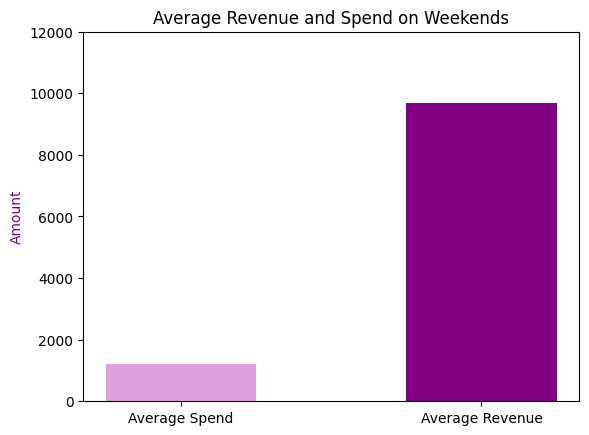

In [34]:
values= [weekend_spend,weekend_rev]
label=["Average Spend","Average Revenue"]

plt.bar(label,values, color=["plum","purple"],width=0.5)
plt.ylabel("Amount", color="purple")
plt.title("Average Revenue and Spend on Weekends", loc='center')

plt.ylim(0,12000)
plt.show()


Above, we have the graphical visualisation of revenue and marketing spend on Weekends. This shows that the company spends or allocate less money and generate more more money from their activities, that being said they are making profit

### For weekday:

In [35]:
weekday_rev=DF[DF["Weekday"]==True]["Revenue"].mean()
weekday_spend=DF[DF["Weekday"]==True]["Marketing Spend"].mean()


In [36]:
weekday_rev

10602.432080092192

In [37]:
weekday_spend

1424.356611291628

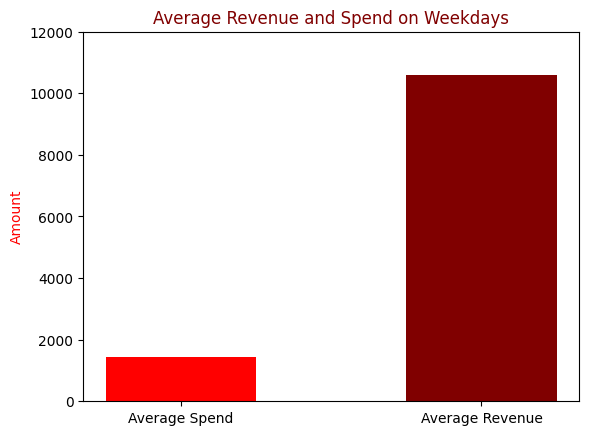

In [38]:
values= [weekday_spend,weekday_rev]
label=["Average Spend","Average Revenue"]

plt.bar(label,values, color=["red","maroon"],width=0.5)
plt.ylabel("Amount", color="red")
plt.title("Average Revenue and Spend on Weekdays", loc='center', color="maroon")
plt.ylim(0,12000)
plt.show()

As seen above, the company makes more profit than they spend also on weekdays and compared to the weekends the revenue generated on the weekdays are higher


### Showing trends
* showing trends in Cost per Click (CPC) with the Promotion Blue and Promotion Red campaign across various time such as different days


In [39]:
DF.head()

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks,ROMI,CPC,Day,Month_Name,Weekday,Weekend,Holiday
0,2020-11-09,34.0,11.0,11.0,2020,Monday,465.0,651.375,No Promo,707.0,-0.286,0.921,9,November,True,False,False
1,2020-11-10,34.0,11.0,11.0,2020,Tuesday,10386.0,1298.250,Promotion Red,1455.0,7.000,0.892,10,November,True,False,False
2,2020-11-11,34.0,11.0,11.0,2020,Wednesday,12475.0,1559.375,Promotion Blue,1520.0,7.000,1.026,11,November,True,False,False
3,2020-11-12,34.0,11.0,11.0,2020,Thursday,11712.0,1801.750,No Promo,1726.0,5.500,1.044,12,November,True,False,False
4,2020-11-13,34.0,11.0,11.0,2020,Friday,10000.0,2614.500,No Promo,2134.0,2.825,1.225,13,November,True,False,False


first i seperate the values Promotion Red and Promotion Blue from the column using the copy function

In [40]:
DF_blue = DF[DF['Promo']=='Promotion Blue'].copy()
DF_red = DF[DF['Promo']=='Promotion Red'].copy()

In [41]:
DF_blue.head()

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks,ROMI,CPC,Day,Month_Name,Weekday,Weekend,Holiday
2,2020-11-11,34.0,11.0,11.0,2020,Wednesday,12475.000000,1559.375000,Promotion Blue,1520.0,7.000,1.026,11,November,True,False,False
5,2020-11-14,34.0,11.0,11.0,2020,Saturday,12996.000000,1444.000000,Promotion Blue,1316.0,8.000,1.097,14,November,True,False,False
6,2020-11-15,35.0,11.0,11.0,2020,Sunday,11929.000000,1325.444444,Promotion Blue,1287.0,8.000,1.030,15,November,False,True,False
8,2020-11-17,35.0,11.0,11.0,2020,Tuesday,12016.000000,1092.363636,Promotion Blue,1448.0,10.000,0.754,17,November,True,False,False
14,2020-11-23,36.0,11.0,11.0,2020,Monday,10471.134831,4284.750000,Promotion Blue,2632.0,1.444,1.628,23,November,True,False,False


In [42]:
DF_red.head()

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks,ROMI,CPC,Day,Month_Name,Weekday,Weekend,Holiday
1,2020-11-10,34.0,11.0,11.0,2020,Tuesday,10386.0,1298.250000,Promotion Red,1455.0,7.000,0.892,10,November,True,False,False
11,2020-11-20,35.0,11.0,11.0,2020,Friday,15188.0,1687.555556,Promotion Red,1819.0,8.000,0.928,20,November,True,False,False
13,2020-11-22,36.0,11.0,11.0,2020,Sunday,14012.0,2745.375000,Promotion Red,2138.0,4.104,1.284,22,November,False,True,False
17,2020-11-26,36.0,11.0,11.0,2020,Thursday,12425.0,1572.181818,Promotion Red,2105.0,6.903,0.747,26,November,True,False,False
18,2020-11-27,36.0,11.0,11.0,2020,Friday,14760.0,1384.105403,Promotion Red,1671.0,9.664,0.828,27,November,True,False,False


Now i will go ahead to visualise the promotion campaigns with different time scenarios, starting with day using line plot
according to research is one of the most reliable ways to depict trends

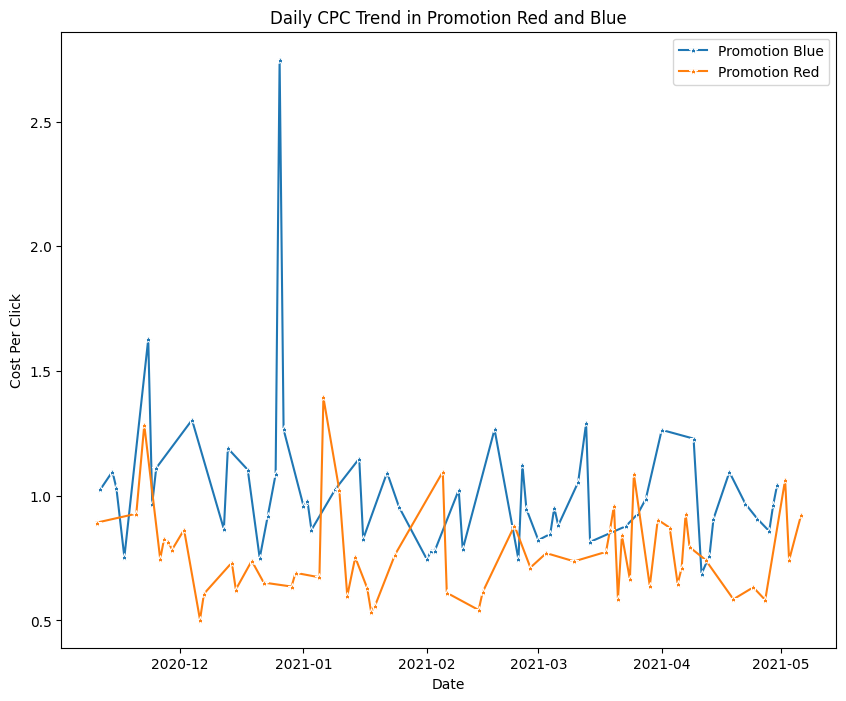

In [43]:
plt.figure(figsize=(10,8))
sns.lineplot(data=DF_blue,x="Date",y="CPC", marker="*", label="Promotion Blue")
sns.lineplot(data=DF_red,x= "Date",y= "CPC", marker="*", label="Promotion Red")
plt.title("Daily CPC Trend in Promotion Red and Blue")
plt.xlabel("Date")
plt.ylabel("Cost Per Click")
plt.legend()
plt.show()

This is a line plot diagram showing the trends of the campaigns based on their colour on various days as identified by the * marker on the graph. Displaying both campaigns on the same graph seemed like a good idea as it helps us identify which costs more which in this case is Promotion Blue

* For Monthly trends

In [44]:
month_promo_blue= DF_blue.groupby(["Year","Month_Name"])["CPC"].mean().reset_index()

Using our copied out data for promotion blue I'm trying to arrange the year and months which the cpc average will be analysed with

In [45]:
month_promo_blue

,Year,Month_Name,CPC
0,2020,December,1.247889
1,2020,November,1.087714
2,2021,April,0.971182
3,2021,February,0.910333
4,2021,January,0.981250
5,2021,March,0.945400


In [46]:
month_promo_blue["Promo"]="Promotion Blue"

Doing the same thing for promotion red

In [47]:
month_promo_red= DF_red.groupby(["Year","Month_Name"])["CPC"].mean().reset_index()

In [48]:
month_promo_red

,Year,Month_Name,CPC
0,2020,December,0.672000
1,2020,November,0.896714
2,2021,April,0.721333
3,2021,February,0.742333
4,2021,January,0.769778
5,2021,March,0.802273
6,2021,May,0.909333


In [49]:
month_promo_red["Promo"]="Promotion Red"

After sorting out our values for promotion blue and red respectively, I'll add both of them together to be able to visualise them on the same chart so it would be easier to compare them

In [50]:
month_promo= pd.concat([month_promo_blue, month_promo_red])

In [51]:
month_promo

,Year,Month_Name,CPC,Promo
0,2020,December,1.247889,Promotion Blue
1,2020,November,1.087714,Promotion Blue
2,2021,April,0.971182,Promotion Blue
3,2021,February,0.910333,Promotion Blue
4,2021,January,0.981250,Promotion Blue
5,2021,March,0.945400,Promotion Blue
0,2020,December,0.672000,Promotion Red
1,2020,November,0.896714,Promotion Red
2,2021,April,0.721333,Promotion Red
3,2021,February,0.742333,Promotion Red


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


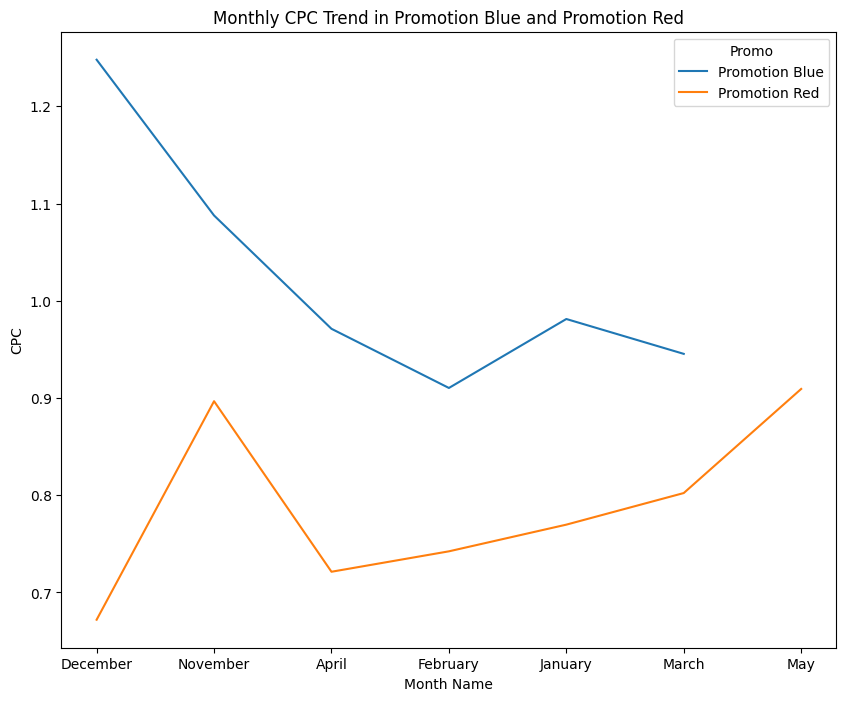

In [52]:
plt.figure(figsize=(10,8))
sns.lineplot(data=month_promo, x="Month_Name", y= "CPC", hue="Promo", markers="*")
plt.title("Monthly CPC Trend in Promotion Blue and Promotion Red")
plt.xlabel("Month Name")
plt.ylabel("CPC")
plt.show()

This visualisation shows Promotion Blue has more Costs per clicks than Red, although its average declined from its initial start unlike promotion Red

which starts low but increases towards the end although not in a linear fashion

* Between weekends and weekdays

In [53]:
ww_blue= DF_blue.groupby("Weekend")["CPC"].mean().reset_index()

In [54]:
ww_blue["Promo"]="Promotion Blue"


In [55]:
ww_red= DF_red.groupby("Weekend")["CPC"].mean().reset_index()
ww_red

,Weekend,CPC
0,False,0.768289
1,True,0.797667


In [56]:
ww_red["Promo"]="Promotion Red"

In [57]:
ww=pd.concat([ww_blue,ww_red])

Concerning weekday and weekend, we only have our data for weekend therefore we have to make another for weekday

but doing so can make our work ambigous and considering a day can't be both weekend and weekday, a function can come in handy

In [58]:
ww

,Weekend,CPC,Promo
0,False,1.026311,Promotion Blue
1,True,0.982333,Promotion Blue
0,False,0.768289,Promotion Red
1,True,0.797667,Promotion Red


In [59]:
ww['Day Type']= ww["Weekend"].apply(lambda x: "Weekend" if x else "Weekday")

The block of code above is creating another column Day Type on the ww(Weekend Weekday) data set and working on the weekend column using lambda function to determine if a row on the column is weekend(true) or weekday(false)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


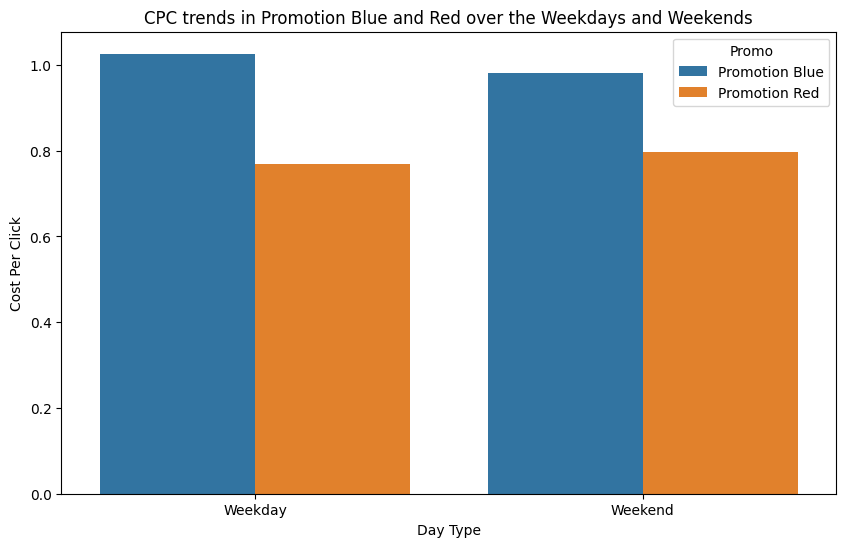

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(data=ww, x='Day Type', y= "CPC", hue="Promo")
plt.title("CPC trends in Promotion Blue and Red over the Weekdays and Weekends")
plt.xlabel("Day Type")
plt.ylabel("Cost Per Click")
plt.show()

This visualisation shows that the cost per click for promotion blue is higher on weekdays but the promotion red is higher on weekends

* For Holiday

In [61]:
holi_blue= DF_blue.groupby("Holiday")["CPC"].mean().reset_index()
holi_blue

,Holiday,CPC
0,False,0.984941
1,True,1.597667


In [62]:
holi_blue["Promo"]= "Promotion Blue"

In [63]:
holi_red= DF_red.groupby("Holiday")["CPC"].mean().reset_index()
holi_red

,Holiday,CPC
0,False,0.777547
1,True,0.542000


In [64]:
holi_red["Promo"]= "Promotion Red"

In [65]:
holi_avg= pd.concat([holi_blue, holi_red])

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


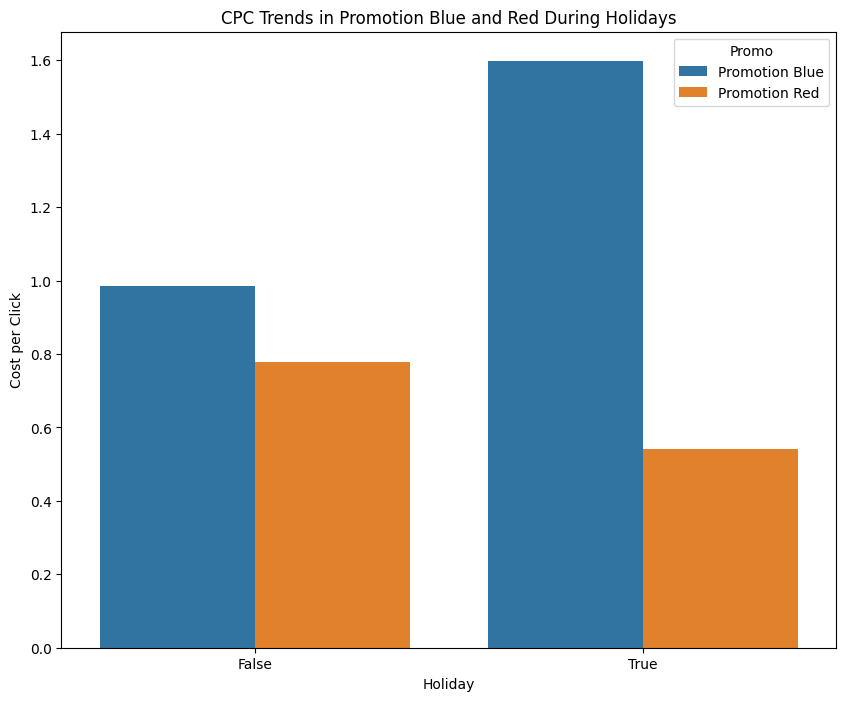

In [66]:
plt.figure(figsize=(10,8))
sns.barplot(data=holi_avg,x="Holiday", y="CPC", hue="Promo")
plt.title("CPC Trends in Promotion Blue and Red During Holidays")
plt.xlabel("Holiday")
plt.ylabel("Cost per Click")
plt.show()

The True stands for holiday season and the false stands for otherwise

During the holiday season,promotion blue seems more effective than red 

The promotion red during holidays is lower than promotion red during regular days

* For Year

In [67]:
year_blue=DF_blue.groupby("Year")["CPC"].mean().reset_index()
year_blue

,Year,CPC
0,2020,1.177812
1,2021,0.952105


In [68]:
year_blue["Promo"]= "Promotion Blue"

In [69]:
year_red= DF_red.groupby("Year")["CPC"].mean().reset_index()
year_red

,Year,CPC
0,2020,0.770312
1,2021,0.774395


In [70]:
year_red["Promo"]= "Promotion Red"

In [71]:
year=pd.concat([year_blue,year_red])

In [72]:
year

,Year,CPC,Promo
0,2020,1.177812,Promotion Blue
1,2021,0.952105,Promotion Blue
0,2020,0.770312,Promotion Red
1,2021,0.774395,Promotion Red


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


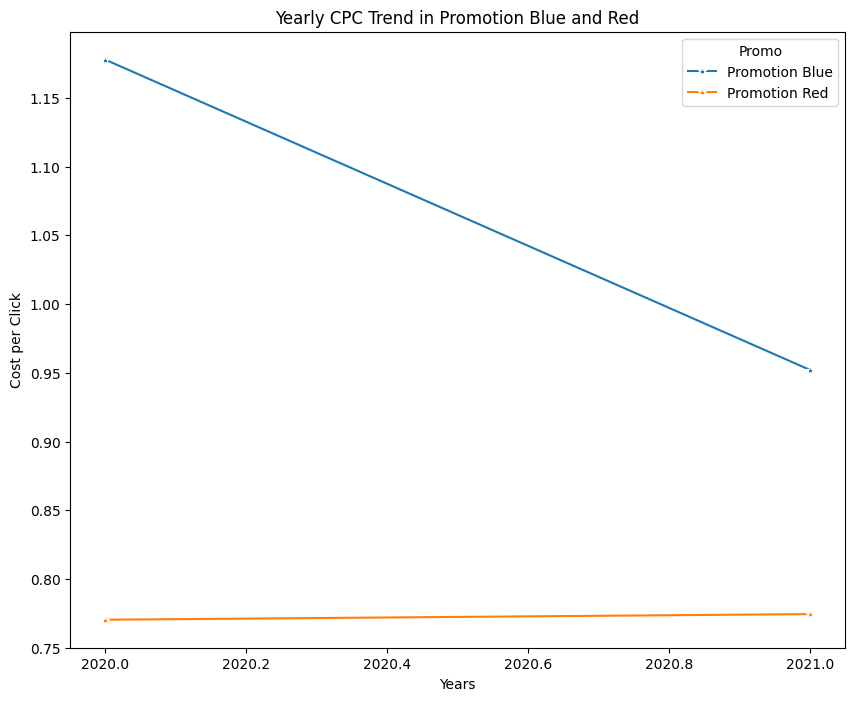

In [73]:
plt.figure(figsize=(10,8))
sns.lineplot(data=year, x="Year", y= "CPC",hue="Promo", marker="*")
plt.xlabel("Years")
plt.ylabel("Cost per Click")
plt.title("Yearly CPC Trend in Promotion Blue and Red")
plt.show()

This visualisation shows how promotion red and blue have been over the years (2020-2021)

Promotion Blue although higher than Promotion Red over the years is declining

while Promotion Red had been maintaining a steady pace not moving up or down

#### NO PROMO
* Daily

In [74]:
DF_np=DF[DF["Promo"]=="No Promo"].copy()

In [75]:
DF_np.head()

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks,ROMI,CPC,Day,Month_Name,Weekday,Weekend,Holiday
0,2020-11-09,34.0,11.0,11.0,2020,Monday,465.0,651.375000,No Promo,707.000000,-0.286,0.921,9,November,True,False,False
3,2020-11-12,34.0,11.0,11.0,2020,Thursday,11712.0,1801.750000,No Promo,1726.000000,5.500,1.044,12,November,True,False,False
4,2020-11-13,34.0,11.0,11.0,2020,Friday,10000.0,2614.500000,No Promo,2134.000000,2.825,1.225,13,November,True,False,False
7,2020-11-16,35.0,11.0,11.0,2020,Monday,5359.0,1119.111111,No Promo,1548.000000,3.789,0.723,16,November,True,False,False
9,2020-11-18,35.0,11.0,11.0,2020,Wednesday,7441.0,906.700000,No Promo,1650.436464,7.207,0.549,18,November,True,False,False


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


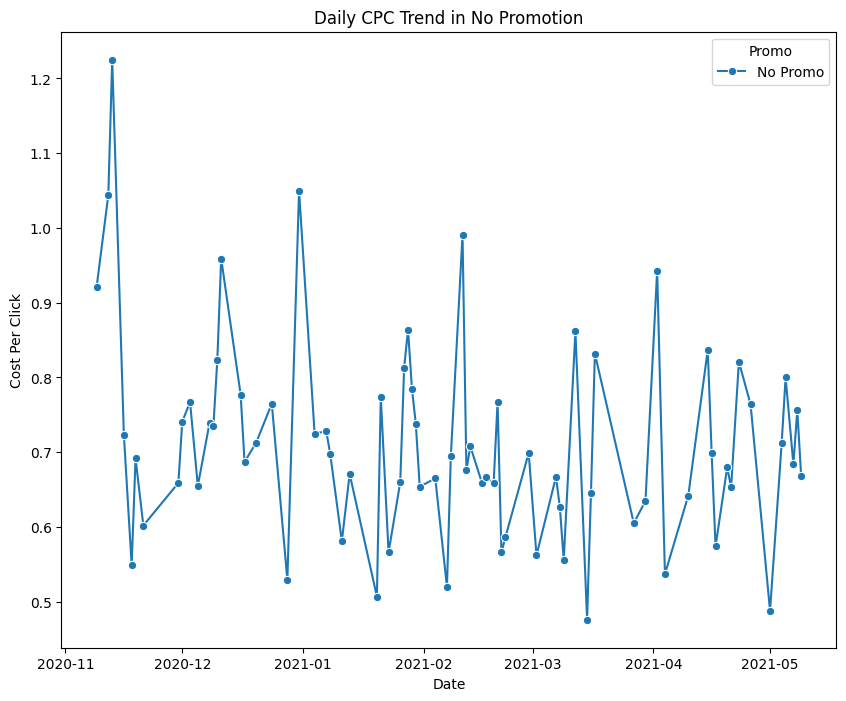

In [76]:
plt.figure(figsize=(10,8))
sns.lineplot(data=DF_np, x="Date", y="CPC", hue="Promo",marker="o")
plt.title("Daily CPC Trend in No Promotion")
plt.xlabel("Date")
plt.ylabel("Cost Per Click")
plt.show()

The graph shows how unstable no promotion is and how it easily flunctuates

Aside that, one clear thing to see her is how the peak for No promotion was at the beginning and it hasn't been able to reach such heights again

* For Monthly

In [77]:
month_np = DF_np.groupby(["Year","Month_Name"])["CPC"].mean().reset_index()

In [78]:
month_np

,Year,Month_Name,CPC
0,2020,December,0.764615
1,2020,November,0.801875
2,2021,April,0.715000
3,2021,February,0.681385
4,2021,January,0.697429
5,2021,March,0.646800
6,2021,May,0.684833


If you look above, the months are not arranged in ascending order so in order to fix that i 

In [79]:
m_order=[ "November", "December","January","February", "March", "April", "May", "June", 'July', "August", "September", "October"]

month_np["Month_Name"]=pd.Categorical(month_np["Month_Name"],categories=m_order,ordered=True)
month_np=month_np.sort_values("Month_Name").reset_index(drop=True)

In [80]:
month_np

,Year,Month_Name,CPC
0,2020,November,0.801875
1,2020,December,0.764615
2,2021,January,0.697429
3,2021,February,0.681385
4,2021,March,0.646800
5,2021,April,0.715000
6,2021,May,0.684833


In [81]:
month_np["Promo"]= "No Promo"

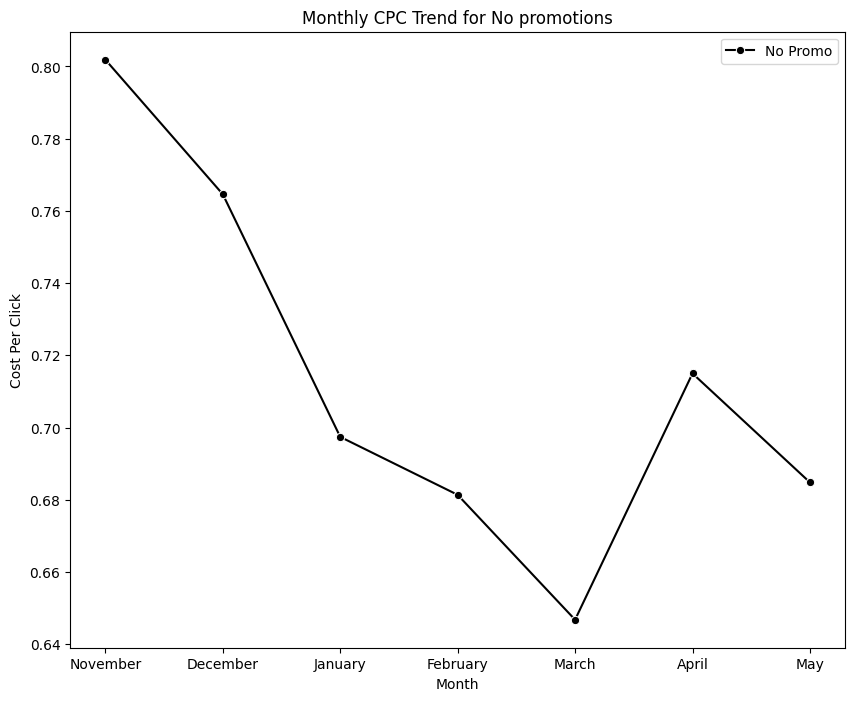

In [82]:
plt.figure(figsize=(10,8))
sns.lineplot(data=month_np,x="Month_Name",y="CPC",marker="o", color="black", label= "No Promo")
plt.title("Monthly CPC Trend for No promotions")
plt.xlabel("Month")
plt.ylabel("Cost Per Click")
plt.show()

Just like in the visualisation of the Daily Trend, the No promotion peaks at the early stages that is the Month of November and declines further but not in a linear manner

* For Weekend and Weekday

In [83]:
ww_np=DF_np.groupby("Weekend")["CPC"].mean().reset_index()

In [84]:
ww_np

,Weekend,CPC
0,False,0.722424
1,True,0.628000


In [85]:
ww_np["Day Type"]= ww_np["Weekend"].apply(lambda x: "Weekend"if x else "Weekday")

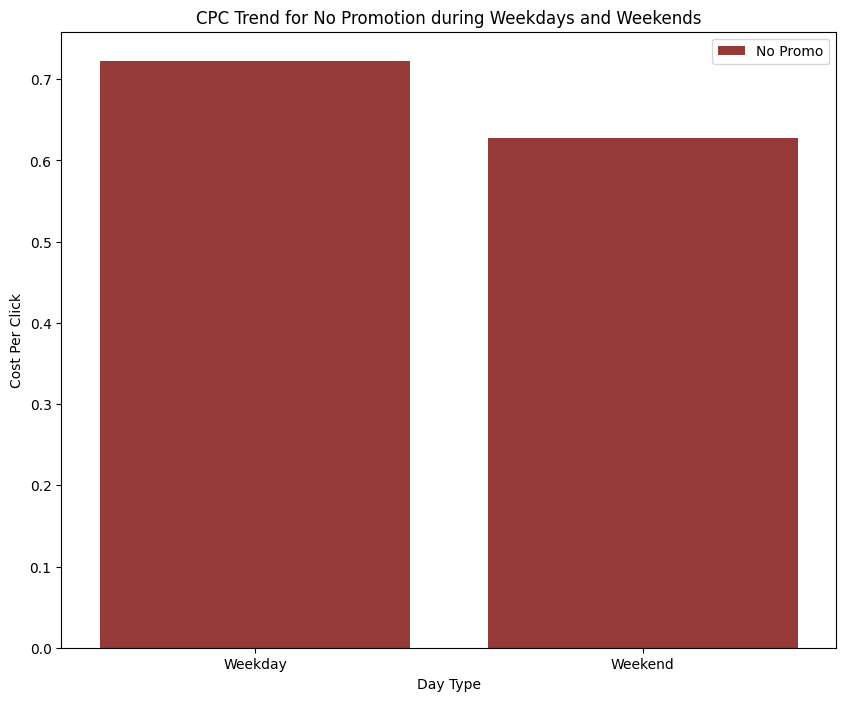

In [86]:
plt.figure(figsize=(10,8))
sns.barplot(data=ww_np,x="Day Type", y="CPC", color='brown', label= "No Promo")
plt.title("CPC Trend for No Promotion during Weekdays and Weekends")
plt.xlabel("Day Type")
plt.ylabel("Cost Per Click")
plt.show()

This shows that the no promotion of cost per click on weekdays is higher than of weekends

* For Holidays

In [87]:
holi_np=DF_np.groupby("Holiday")["CPC"].mean().reset_index()

In [88]:
holi_np

,Holiday,CPC
0,False,0.712216


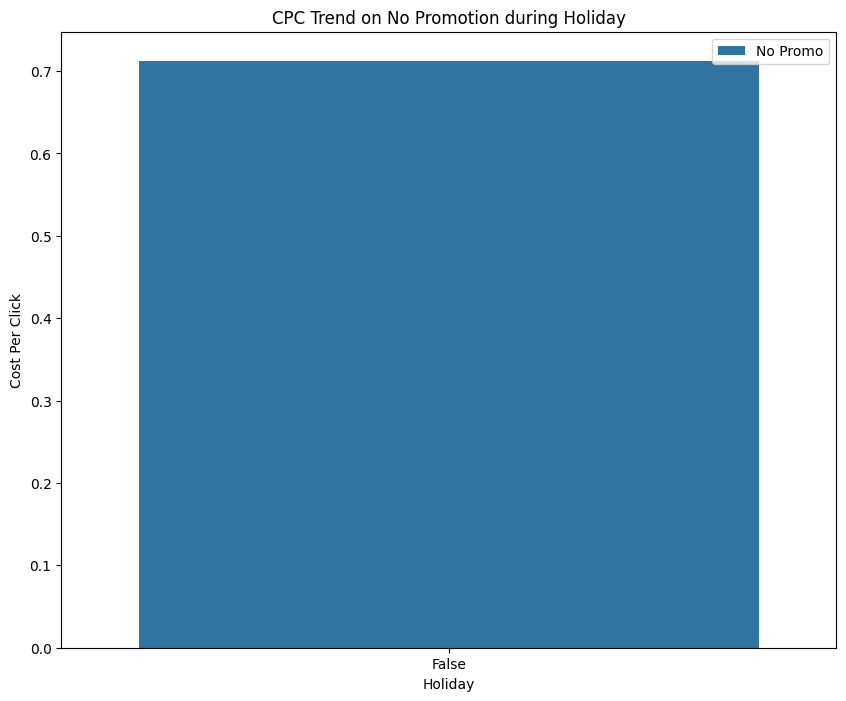

In [89]:
plt.figure(figsize=(10,8))
sns.barplot(data=holi_np,x="Holiday",y="CPC", label= "No Promo")
plt.title("CPC Trend on No Promotion during Holiday")
plt.xlabel("Holiday")
plt.ylabel("Cost Per Click")
plt.show()

This visualisation shows that during holidays there were never No Promotions, explaining the total FALSE bar chart

In [90]:
year_np=DF_np.groupby("Year")["CPC"].mean().reset_index()

In [91]:
year_np

,Year,CPC
0,2020,0.77881
1,2021,0.68583


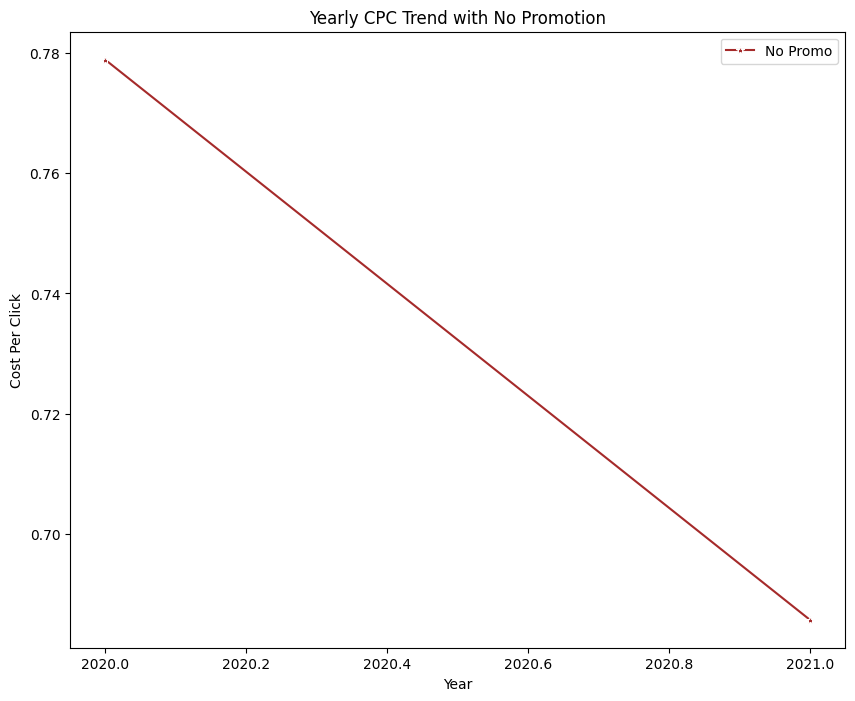

In [92]:
plt.figure(figsize=(10,8))
sns.lineplot(data=year_np,x="Year", y="CPC", marker="*", label="No Promo", color="brown")
plt.title("Yearly CPC Trend with No Promotion")
plt.xlabel("Year")
plt.ylabel("Cost Per Click")
plt.show()

Between the year 2020 to 2021, No promotions had high Cost per Click but towards May 2021 it declined

* Exploratory Analyses of ROMI with Promotion Red and Blue

Text(0, 0.5, 'Return on Marketing Investment')

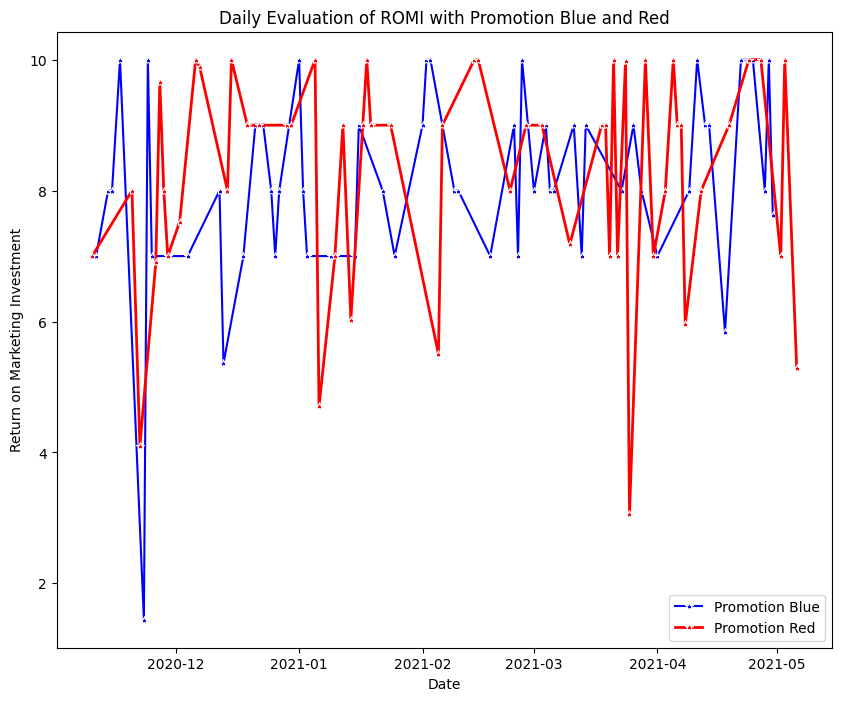

In [93]:
plt.figure(figsize=(10,8))
sns.lineplot(data=DF_blue,x="Date",y="ROMI", marker="*", label= "Promotion Blue", color="blue")
sns.lineplot(data=DF_red,x="Date",y="ROMI", marker="*", label= "Promotion Red", lw=2, color="red")
plt.title("Daily Evaluation of ROMI with Promotion Blue and Red")
plt.xlabel("Date")
plt.ylabel("Return on Marketing Investment")

The visualisation above shows that in the case of Return of Investments, Promotion Red is a better promotion choice. 

It hasn't had ROMI as low as Promotion Blue and has more higher ROMI value than lower ROMI values

Exploratory analysis of ROMI with Promotion Red and Blue in Pie Chart

In [94]:
r_blue=DF_blue.groupby("Promo" )["ROMI"].mean().reset_index()

In [95]:
r_red=DF_red.groupby("Promo" )["ROMI"].mean().reset_index()

In [96]:
r_total=pd.concat([r_blue,r_red])

In [97]:
r_total

,Promo,ROMI
0,Promotion Blue,8.116130
0,Promotion Red,8.273981


In [98]:
r_total.shape

(2, 2)

In [99]:
x=["Promotion Blue",'Promotion Red']
y= r_total["ROMI"]

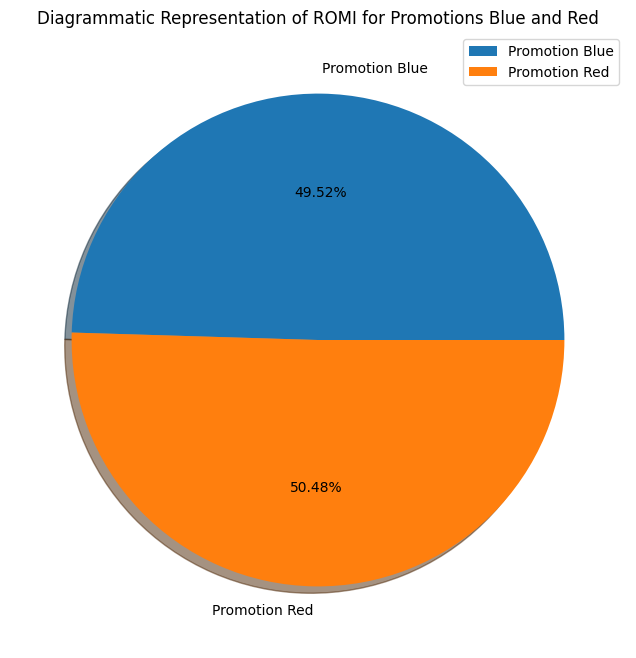

In [100]:
plt.figure(figsize=(10,8))
plt.pie(y, labels=x, autopct='%1.2f%%', shadow=True)
plt.legend(x, loc="upper right")
plt.title("Diagrammatic Representation of ROMI for Promotions Blue and Red")
plt.show()

This how that the average ROMI is higher during Promotion Red than Blue by 0.96% 

That means Promotion Red is more favourable to the increase of the ROMI

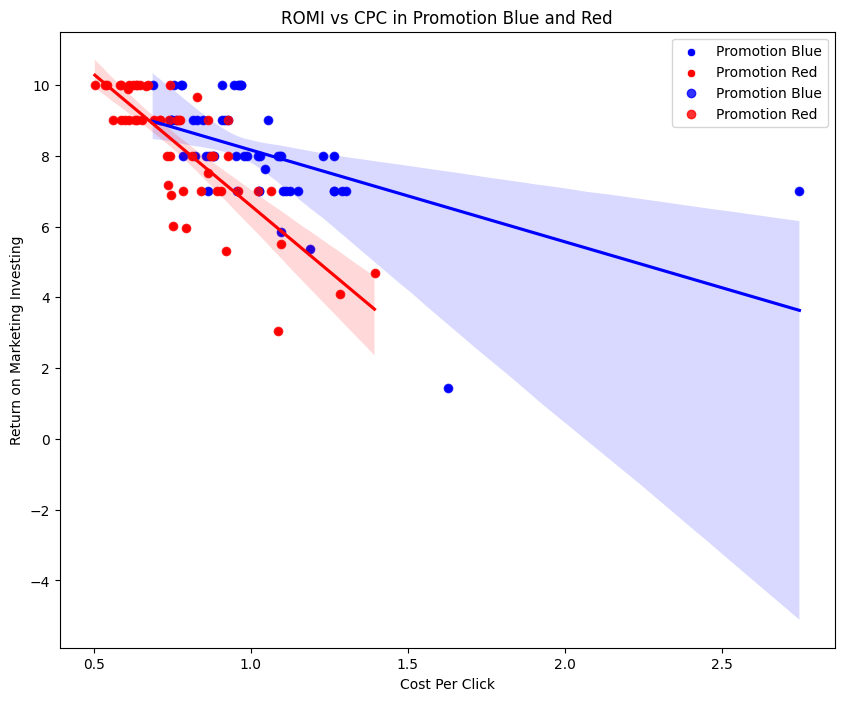

In [103]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="CPC", y= "ROMI", data=DF_blue,color="blue", label="Promotion Blue")
sns.scatterplot(x="CPC", y= "ROMI", data=DF_red,color="red", label="Promotion Red")
sns.regplot(x="CPC", y= "ROMI", data=DF_blue,color="blue", label="Promotion Blue")
sns.regplot(x="CPC", y= "ROMI", data=DF_red,color="red", label="Promotion Red")
plt.xlabel("Cost Per Click")
plt.ylabel("Return on Marketing Investing")
plt.title("ROMI vs CPC in Promotion Blue and Red")
plt.legend()
plt.show()

The visualisation above shows the correlation of return of investments and cost per click depending the the promotion, that is red or blue

Above shows that in either of the promotions there is a negative correlation between ROMI and CPC, that is as the ROMI increases the CPC decreases
